1. Analyze a real data set from a data set that is publicly available, using techniques from class or closely related techniques.

   why Random Forest:
       1. It can handle missing values
       2. Categorical values don't have to be converted into 1-hot encoded features
       
– how to use a package or library for model estimation (Methodology)
  Used scikit-learn Linear Regression Model - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

# Handling Warnings
warnings.filterwarnings('ignore')

# Importing Data 

transaction_data = pd.read_csv("transactions.csv")
transaction_data['date'] = pd.to_datetime(transaction_data['date'], format = "%Y-%m-%d")
oil_data = pd.read_csv("oil.csv")
oil_data['date'] = pd.to_datetime(oil_data['date'], format = "%Y-%m-%d")
store_data = pd.read_csv("stores.csv")
holiday_data = pd.read_csv("holidays_events.csv")
holiday_data['date'] = pd.to_datetime(holiday_data['date'], format = "%Y-%m-%d")
data = pd.read_csv("train.csv")
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")


In [3]:
import pandas as pd

# Set your minimum and maximum dates
min_date = oil_data.date.min()
max_date = oil_data.date.max()

# Generate a range of dates between min and max dates
date_range = pd.date_range(start=min_date, end=max_date, freq='D')

# Create a DataFrame with the dates
full_oil_data = pd.DataFrame({'date': date_range})



full_oil_data = pd.merge(full_oil_data, oil_data, on='date', how='left')

# intepolate the dcoilwitco oilprices column
full_oil_data['dcoilwtico'] = full_oil_data['dcoilwtico'].interpolate(method='nearest')

full_oil_data.loc[0,'dcoilwtico'] = 93.14

full_oil_data.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,93.12


In [4]:
# data.store_nbr.nunique() # 54
# data.date.min(), data.date.max() # Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00')

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_test_preds = model.predict(X_test)

In [7]:
transaction_data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
oil_data.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [9]:
store_data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
s1 = set(store_data.city.unique())

In [11]:
s2 = set(holiday_data.locale_name.unique())

In [12]:
s1 - s2, s2 - s1

({'Babahoyo', 'Daule', 'Playas'},
 {'Cotopaxi',
  'Ecuador',
  'Imbabura',
  'Santa Elena',
  'Santo Domingo de los Tsachilas'})

In [13]:
national_holidays = holiday_data.loc[holiday_data.locale_name=="Ecuador"]
national_holidays = pd.DataFrame({'date':national_holidays.date.unique(), 'is_national_holiday' : 1})
national_holidays.head()

,date,is_national_holiday
0,2012-08-10,1
1,2012-10-09,1
2,2012-10-12,1
3,2012-11-02,1
4,2012-11-03,1


In [14]:
local_holidays = holiday_data.loc[holiday_data.locale_name!="Ecuador"]
local_holidays = local_holidays[['date', 'locale_name']].drop_duplicates()
local_holidays['is_local_holiday'] = 1

In [15]:
local_holidays.head()

,date,locale_name,is_local_holiday
0,2012-03-02,Manta,1
1,2012-04-01,Cotopaxi,1
2,2012-04-12,Cuenca,1
3,2012-04-14,Libertad,1
4,2012-04-21,Riobamba,1


In [16]:
holiday_data.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'],
      dtype=object)

In [17]:
print(data.shape)
data = pd.merge(data, transaction_data, how='left', on =['date', 'store_nbr'])
print(data.shape)
data = pd.merge(data, full_oil_data, how='left', on =['date'])
print(data.shape)
data = pd.merge(data, store_data, how='left', on =['store_nbr'])
print(data.shape)

(3000888, 6)
(3000888, 7)
(3000888, 8)
(3000888, 12)


In [18]:
print(data.shape)
data = pd.merge(data, national_holidays, how='left', on=['date'])
print(data.shape)

(3000888, 12)
(3000888, 13)


In [19]:
data.city.value_counts()

Quito            1000296
Guayaquil         444576
Santo Domingo     166716
Cuenca            166716
Latacunga         111144
Manta             111144
Machala           111144
Ambato            111144
Quevedo            55572
Esmeraldas         55572
Loja               55572
Libertad           55572
Playas             55572
Daule              55572
Babahoyo           55572
Cayambe            55572
Salinas            55572
Puyo               55572
Guaranda           55572
Ibarra             55572
Riobamba           55572
El Carmen          55572
Name: city, dtype: int64

In [20]:
# {'Babahoyo', 'Daule', 'Playas'} in data but not in holidays

In [21]:
data = pd.merge(data, local_holidays, how='left', left_on=['date', 'city'], right_on=['date', 'locale_name'])
print(data.shape)

(3000888, 15)


In [22]:
data.is_national_holiday = data.is_national_holiday.fillna(0)
data.is_local_holiday = data.is_local_holiday.fillna(0)

data.locale_name = data.locale_name.fillna("NA")

In [23]:
data.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,type,cluster,is_national_holiday,locale_name,is_local_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,93.14,Quito,Pichincha,D,13,1.0,NA,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,93.14,Quito,Pichincha,D,13,1.0,NA,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,93.14,Quito,Pichincha,D,13,1.0,NA,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,93.14,Quito,Pichincha,D,13,1.0,NA,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,93.14,Quito,Pichincha,D,13,1.0,NA,0.0


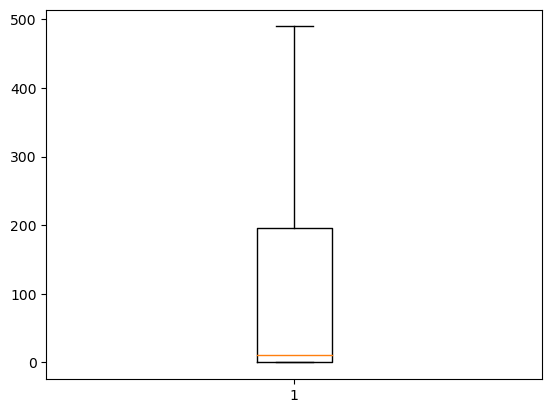

In [24]:
_ = plt.boxplot(data.sales, showfliers=False)

In [25]:
# data.date.min(), data.date.max() # Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00')

In [26]:
split_date = "2017-01-01"

In [27]:
data.transactions = data.transactions.fillna(0)

In [92]:
data['is_oil_high'] = data['dcoilwtico'].apply(lambda x: 1 if x>70 else 0)

In [93]:
train = data.loc[data.date < split_date]
test = data.loc[data.date >= split_date]
print(train.shape, test.shape)

(2596374, 16) (404514, 16)


In [94]:
train.shape[0]  + test.shape[0] == data.shape[0]

True

In [95]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,transactions,dcoilwtico,city,state,type,cluster,is_national_holiday,locale_name,is_local_holiday,is_oil_high
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,0.0,93.14,Quito,Pichincha,D,13,1.0,NA,0.0,1
1,1,2013-01-01,1,BABY CARE,0.0,0,0.0,93.14,Quito,Pichincha,D,13,1.0,NA,0.0,1
2,2,2013-01-01,1,BEAUTY,0.0,0,0.0,93.14,Quito,Pichincha,D,13,1.0,NA,0.0,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,0.0,93.14,Quito,Pichincha,D,13,1.0,NA,0.0,1
4,4,2013-01-01,1,BOOKS,0.0,0,0.0,93.14,Quito,Pichincha,D,13,1.0,NA,0.0,1


In [112]:
# features

cat_columns = ["store_nbr", 'family', 'city', 'state', 'type', 'cluster']
numerical_cols = ["onpromotion", 'is_national_holiday', 'is_local_holiday', 'is_oil_high']
target = "sales"

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [114]:
d = {}
for col in cat_columns:
    d[col] = LabelEncoder()
    train[col] = d[col].fit_transform(train[col])
    test[col] = d[col].transform(test[col])

In [115]:
model = RandomForestRegressor(n_estimators=10, n_jobs=-1)
model.fit(train[cat_columns + numerical_cols], train[target])

RandomForestRegressor(n_estimators=10, n_jobs=-1)

In [116]:
test_preds = model.predict(test[cat_columns + numerical_cols])

In [117]:
# error we will be using is RMSE

# calculate RMSE between test_preds and test[target] and report the RMSE

from sklearn.metrics import mean_squared_log_error

score = mean_squared_log_error(y_true=test[target] , y_pred=test_preds)

1. rmsle without oil price raw feature - 0.5253744189217323
1. rmsle with oil price as raw feature - 0.650
1. rmsle with feature engineered oil price feature ( > 70, <=70) - 0.46217462375578755


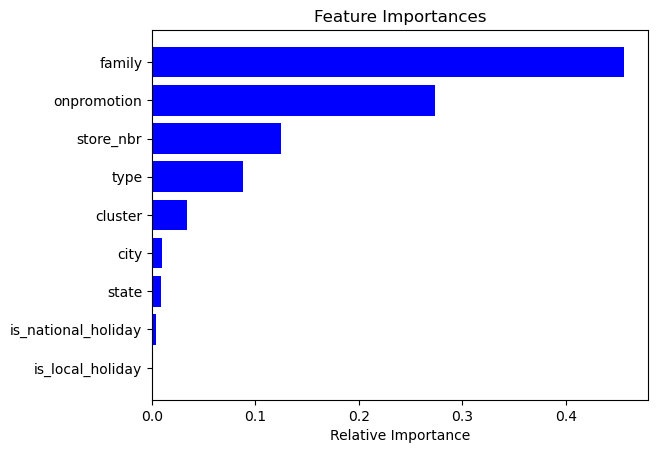

In [84]:
features = cat_columns + numerical_cols
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# ref - https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

– Find significant variables and intuitively explain their effects (Analysis 
result)

Significant variables according to random forest feature importances are family and onpromotion.

For the family feature - 30% of the total sales is from Grocery, 20% of the sales is from beverages and 11% of the sales is from produce.


For the onpromotion feature - 
Interestingly total number of items in a product family that are being promoted has negative impact on total sales.




In [62]:
family_effect = data.groupby(['family']).agg({'sales': 'sum'})
sum_ = family_effect['sales'].sum()
family_effect.sales = round(family_effect.sales * 100 /sum_, 5)
family_effect = family_effect.sort_values(by='sales', ascending=False)

In [64]:
family_effect

,sales
family,
GROCERY I,31.99035
BEVERAGES,20.20728
PRODUCE,11.42880
CLEANING,9.08320
DAIRY,6.00643
BREAD/BAKERY,3.92438
POULTRY,2.96895
MEATS,2.89541
PERSONAL CARE,2.29052


In [66]:
onpromotion_effect = data.groupby(['onpromotion']).agg({'sales': 'sum'})
sum_ = onpromotion_effect['sales'].sum()
onpromotion_effect.sales = round(onpromotion_effect.sales * 100 /sum_, 5)
onpromotion_effect = onpromotion_effect.sort_values(by='sales', ascending=False)

<Axes: xlabel='onpromotion'>

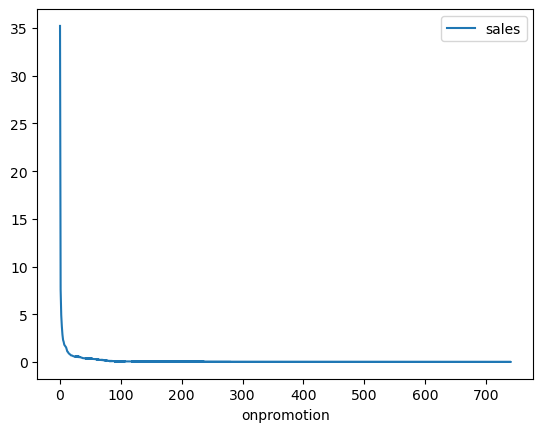

In [68]:
# onpromotion feature analysis
_ = onpromotion_effect.plot()

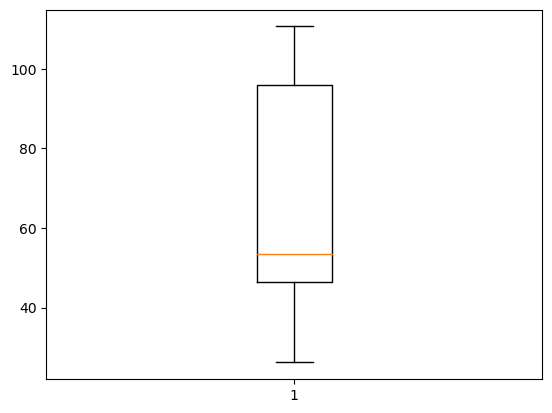

In [108]:
# box plot of oil price
_ = plt.boxplot(data.dcoilwtico)

– Interesting discoveries (Selling points)

Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices. But directly inclduing oil price as feature into the Random forest model did not improve RMSLE. 
Conducting feature engineering on the oil price column and establishing a binary feature by applying a threshold of 70, then incorporating this feature into the model, has resulted in an enhancement of the RMSLE. This highlights the significance of feature engineering.




– What you have learned from the real data analysis: data cleansing, missing data, data transformations, like normalization, taking log and adding square terms (Discussion)

- data cleansing and handling missing data are the most time taking part.
- Data transformations like normalization did not influence the performance of the Random Forest model. 
- Using RMSLE reduces the effect of outliers compared to RMSE.